Considere el siguiente problema de prueba de hipótesis entre dos hipótesis igualmente probables. Bajo la hipótesis  H=0 , la señal observable  Y  es igual a  a+Z   donde  Z  es una variable aleatoria con la siguiente distribución laplaciana:

 $f_Z(z)= \frac{1}{2}e^{-|z- \mu|}$   , donde  $\mu$  es la media de la variable  Z .

Bajo la hipótesis  H=1 ,  Y  viene dado por -a+Z  . Vamos a suponer que  a es positivo.

1. Realice un programa en una Jupyter Notebook que dibuje la funciones de densidad de probabilidad  $f_{Y|H}(y|0)$  y  $f_{Y|H}(y|1)$ .
2. Determine cualitativamente el nivel de decisión óptimo.  Bajo que regla de decisión es óptimo?
3. Determine cuantitativamente el nivel de decisión óptimo.
4. Determine cuantitativamente la probabilidad de error $P_e$ .

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Defino los parametros y funciones necesarias

In [2]:
# Parametros a y media
a = 2 
mu = 0

# Función de densidad Laplaciana para Z
def f_Z(z, mu=mu):
    return 0.5 * np.exp(-np.abs(z - mu))

# Densidad de Y bajo H=0: f_{Y|H}(y|0)= f_Z(y-a)
def f_Y_H0(y, a=a, mu=mu):
    return f_Z(y - a, mu)

# Densidad de Y bajo H=1: f_{Y|H}(y|1)= f_Z(y+a)
def f_Y_H1(y, a=a, mu=mu):
    return f_Z(y + a, mu)

In [3]:
# Rango de valores para y
y = np.linspace(-a-5, a+5, 1000)

fy_H0 = f_Y_H0(y, a, mu)
fy_H1 = f_Y_H1(y, a, mu)

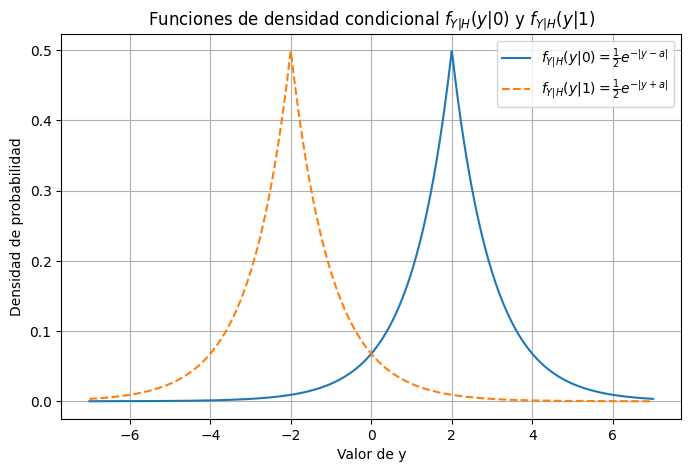

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(y, fy_H0, label=r'$f_{Y|H}(y|0)=\frac{1}{2}e^{-|y-a|}$')
plt.plot(y, fy_H1, label=r'$f_{Y|H}(y|1)=\frac{1}{2}e^{-|y+a|}$', linestyle='--')
plt.xlabel('Valor de y')
plt.ylabel('Densidad de probabilidad')
plt.title('Funciones de densidad condicional $f_{Y|H}(y|0)$ y $f_{Y|H}(y|1)$')
plt.legend()
plt.grid(True)
plt.show()

Para este caso, donde las dos hipótesis $ H = 0 $ y $ H = 1 $ son equiprobables (es decir, P(H=0) = P(H=1) ), el criterio de decisión **Máxima Verosimilitud (ML)** establece que:

- Se elige $ H = 0 $ si $ f_{Y|H}(y|0) > f_{Y|H}(y|1) $  
- Caso contrario, se elige $ H = 1 $

Para determinar el umbral de decisión $ y_0 $, igualamos ambas densidades:

$
\frac{1}{2}e^{-|y - a|} = \frac{1}{2}e^{-|y + a|}
$
Cancelamos el factor común $ \frac{1}{2} $ en ambos lados, y luego aplicamos logaritmo natural:

$
|y - a| = |y + a|
$

La única solución que satisface esta igualdad es:

$
y = 0
$

Por lo tanto, el umbral de decisión óptimo es $ y_0 = 0 $, y la regla de decisión queda:

- Si $ y > 0 $, entonces se decide $ H = 0 $  
- Si $ y < 0 $, entonces se decide $ H = 1 $  
- Si $ y = 0 $, ambas hipótesis son igualmente probables, por lo que se puede decidir arbitrariamente. Por simplicidad, se suele asignar $ H = 0 $


### Nivel de decisión óptimo.

Se pudo observar en el grafico que el nivel de decisión optimo ocurre en y = 0

### Cálculo de la probabilidad de error bajo el criterio ML

#### Para $ H = 0 $:
- Bajo la hipótesis $ H = 0 $, la señal recibida es $ Y = a + Z $, donde $ Z $ es una variable aleatoria con distribución Laplaciana.
- Se comete un error si decidimos $ H = 1 $ cuando en realidad era $ H = 0 $, es decir, cuando $ Y < 0 $.
- A partir de la expresión $ Y = a + Z $, el error se produce cuando:
  $
  a + Z < 0 \Rightarrow Z < -a
  $
- Usamos la función de distribución acumulada del ruido $ Z $ para valores negativos (recordando que es Laplaciano):
  $
  F_Z(z) = \frac{1}{2} e^{z} \quad \text{para } z < 0
  $
- Entonces, la probabilidad de error condicional bajo $ H = 0 $ es:
  $
  P(Y < 0 \mid H = 0) = P(Z < -a) = F_Z(-a) = \frac{1}{2}e^{-a}
  $

#### Para $ H = 1 $:
- Bajo la hipótesis $ H = 1 $, la señal recibida es $ Y = -a + Z $.
- Se comete un error si decidimos $ H = 0 $, es decir, cuando $ Y > 0 $.
- A partir de la expresión $ Y = -a + Z $, el error se produce cuando:
  $
  -a + Z > 0 \Rightarrow Z > a
  $
- La probabilidad de que el ruido supere ese valor es:
  $
  P(Y > 0 \mid H = 1) = P(Z > a) = \frac{1}{2}e^{-a}
  $

#### Probabilidad de error total:
- Como las dos hipótesis son equiprobables, la probabilidad total de error es el promedio de los errores condicionales:
  $
  P_e = \frac{1}{2} \left[ P_e(H=0) + P_e(H=1) \right] = \frac{1}{2}e^{-a}
  $



In [5]:
# Cálculo de la probabilidad de error bajo cada hipótesis
Pe_H0 = 0.5 * np.exp(-a)  # P(Y < 0 | H=0)
Pe_H1 = 0.5 * np.exp(-a)  # P(Y >= 0 | H=1)

# Probabilidad de error total (con hipótesis igualmente probables)
Pe_total = 0.5 * (Pe_H0 + Pe_H1)

print(f"Nivel de decisión óptimo (umbral): y = 0")
print(f"Probabilidad de error bajo H=0: {Pe_H0:.4f}")
print(f"Probabilidad de error bajo H=1: {Pe_H1:.4f}")
print(f"Probabilidad de error total P_e: {Pe_total:.4f}")


Nivel de decisión óptimo (umbral): y = 0
Probabilidad de error bajo H=0: 0.0677
Probabilidad de error bajo H=1: 0.0677
Probabilidad de error total P_e: 0.0677
